<a href="https://colab.research.google.com/github/jernius/Tugas-Rancang-Grafkom/blob/patch-1/First_diabetes_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #pandas = handling dataset
import numpy as np
import matplotlib.pyplot as plt #matplotlib, seaborn = membuat styling confusion matrix
import seaborn as sn #matplotlib, seaborn = membuat styling confusion matrix
from sklearn import svm #svm = membuat SVM classifier
from sklearn.metrics import classification_report, confusion_matrix #lassification_report = membuat classifier report yang berisi accuracy, f-1 score, confusion_matrix = membuat confusion matrix
from sklearn.model_selection import train_test_split #train_test_split = membagi dataset menjadi training dan testing data

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [8]:
y = df['Outcome']
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

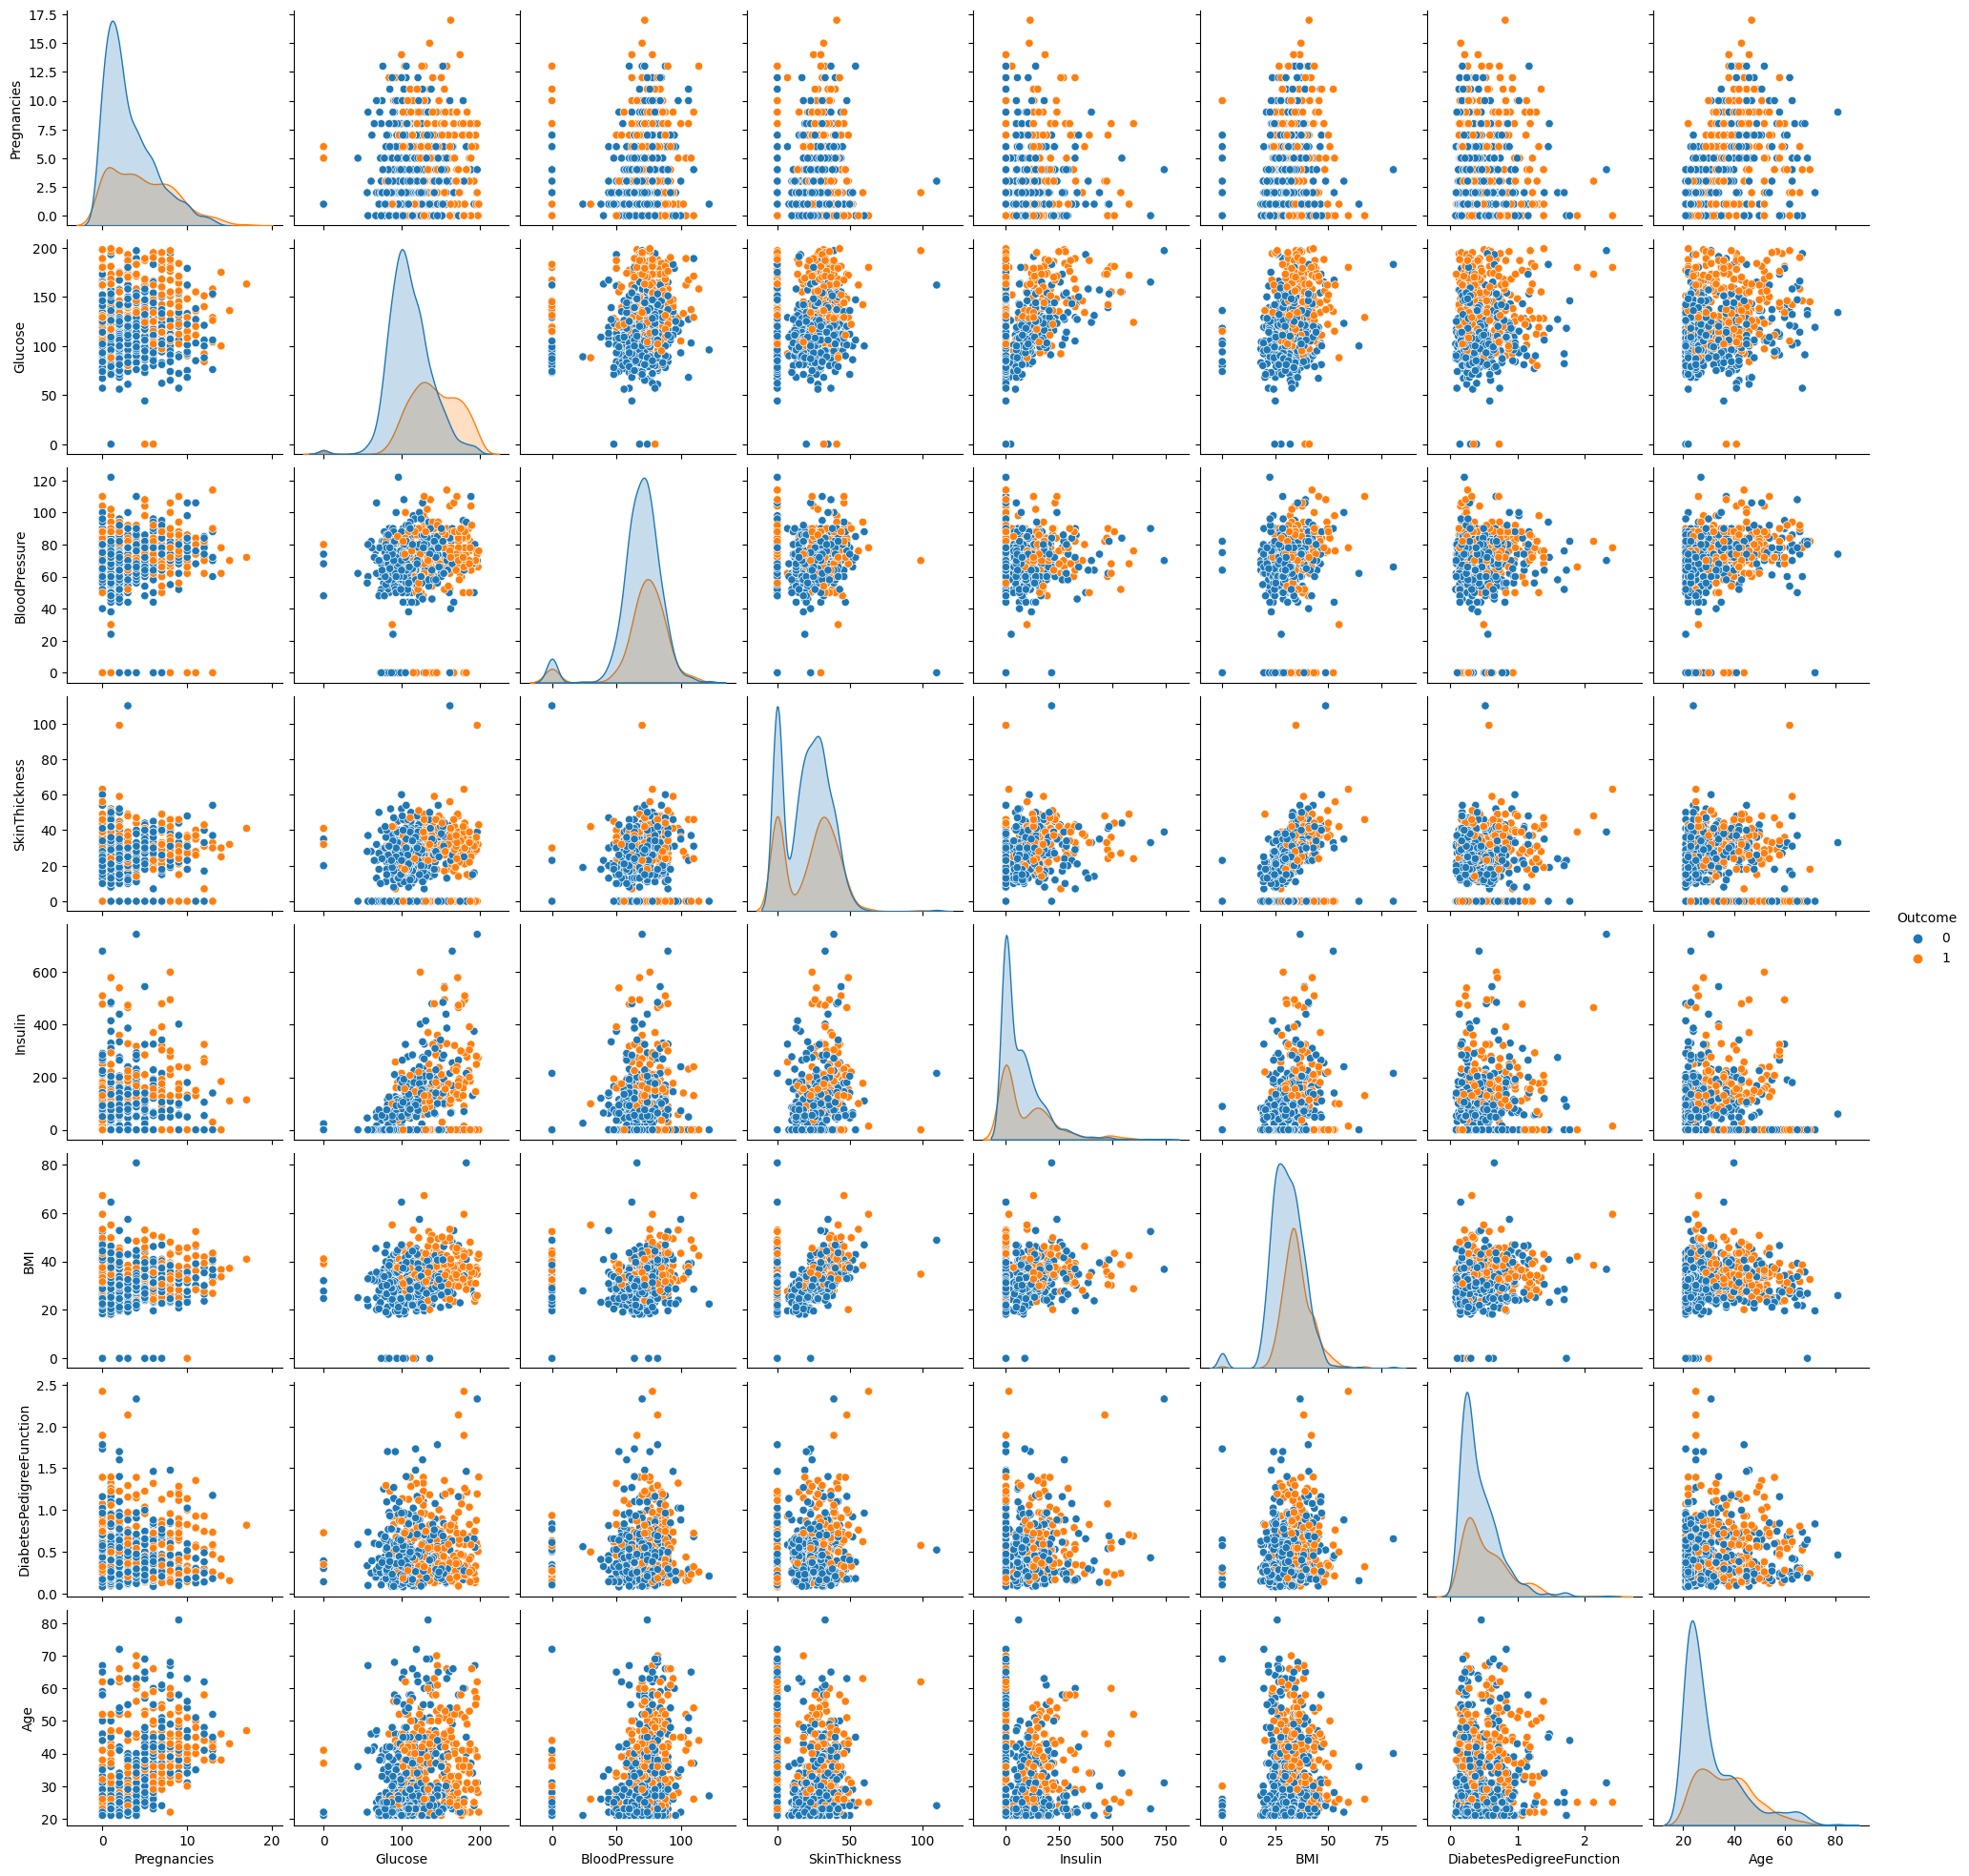

In [ ]:
# Memilih beberapa kolom untuk di-plot pada scatter plot matrix
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

# Membuat scatter plot matrix menggunakan seaborn
sn.pairplot(df[cols], hue='Outcome')

# Menampilkan plot
plt.show()

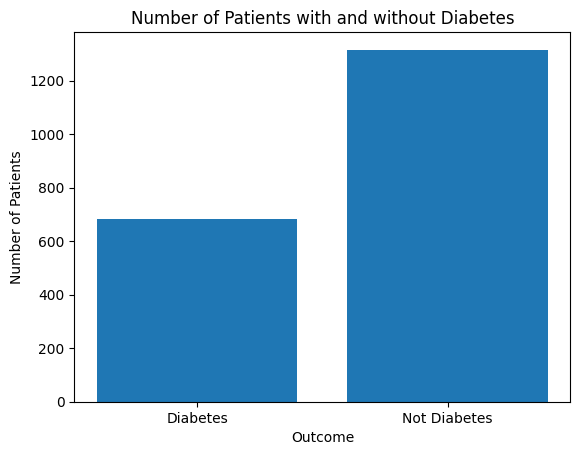

Jumlah pasien diabetes:  684
Jumlah pasien non-diabetes:  1316


In [9]:


# Menghitung jumlah pasien yang terkena diabetes dan yang tidak terkena diabetes
num_diabetes = len(df[df['Outcome'] == 1])
num_not_diabetes = len(df[df['Outcome'] == 0])

# Membuat bar plot menggunakan matplotlib
plt.bar(['Diabetes', 'Not Diabetes'], [num_diabetes, num_not_diabetes])

# Menambahkan judul dan label pada plot
plt.title('Number of Patients with and without Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')

# Menampilkan plot
plt.show()
print("Jumlah pasien diabetes: ", num_diabetes)
print("Jumlah pasien non-diabetes: ", num_not_diabetes)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [11]:
#menggunakan SVM library untuk membuat SVM classifier
#classifier = svm.SVC(kernel = 'linear')
classifier = svm.SVC(kernel = 'rbf', gamma=0.01,C=10)
#classifier = svm.SVC(kernel = 'rbf')
#classifier = svm.SVC(kernel='poly')
#classifier = svm.SVC(kernel='poly', degree=1)

#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)

#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)

#menampilkan classification report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       0.99      0.95      0.97       128

    accuracy                           0.98       400
   macro avg       0.99      0.97      0.98       400
weighted avg       0.98      0.98      0.98       400



In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print("Akurasi model: {:.2f}%".format(accuracy*100))

Akurasi model: 98.25%


Text(95.72222222222221, 0.5, 'Truth')

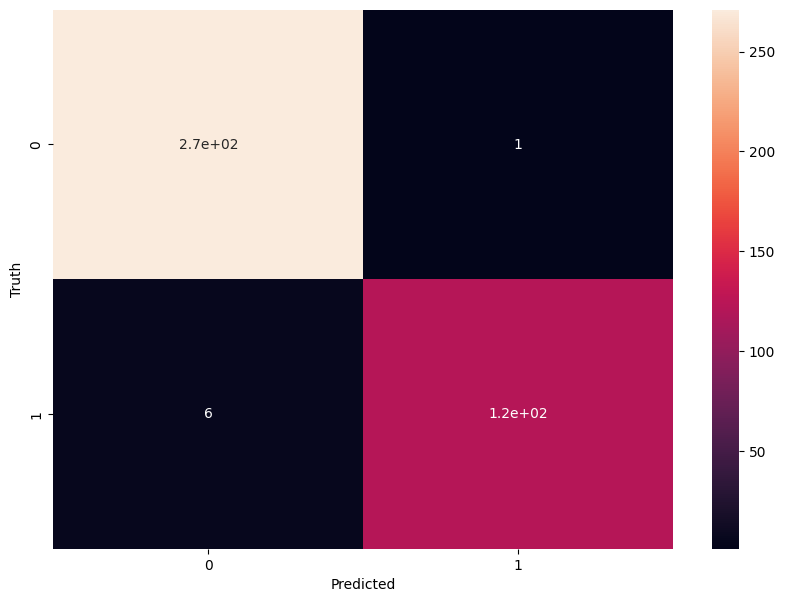

In [13]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
from sklearn.naive_bayes import GaussianNB

#memanggil kelas
naive_bayes = GaussianNB(var_smoothing=0.01)

#Menyesuaikan data ke pengklasifikasi
naive_bayes.fit(X_train , y_train)

#Predict
y_predicted = naive_bayes.predict(X_test)
y_predicted

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       272
           1       0.71      0.48      0.58       128

    accuracy                           0.77       400
   macro avg       0.75      0.70      0.71       400
weighted avg       0.76      0.77      0.76       400



In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print("Akurasi model: {:.2f}%".format(accuracy*100))

Akurasi model: 77.25%


Text(69.0, 0.5, 'Truth')

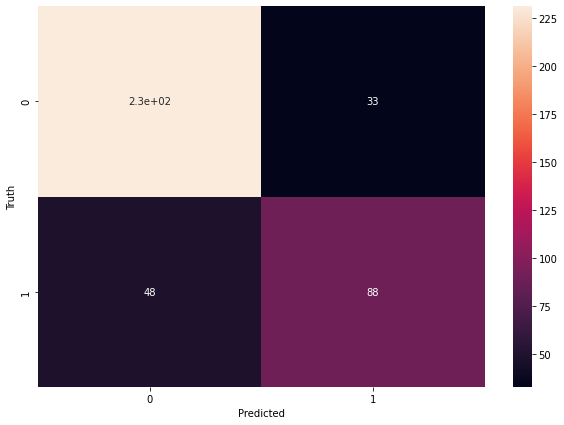

In [ ]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predicted)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')